# Bayer Data Scientist Internship

**To determine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides, or damaged by other reasons.**

*ID: UniqueID*

*Estimated_Insects_Count: Estimated insects count per square meter*

*Crop_Type: Category of Crop(0,1)*

*Soil_Type: Category of Soil (0,1)*

*Pesticide_Use_Category: Type of pesticides uses (1- Never, 2-Previously Used, 3-Currently Using)*

*Number_Doses_Week: Number of doses per week* 

*Number_Weeks_Used: Number of weeks used*

*Number_Weeks_Quit: Number of weeks quit*

*Season: Season Category (1,2,3)*

*Crop_Damage: Crop Damage Category (0=alive, 1=Damage due to other causes, 2=Damage due to Pesticides)*

## 1. Exploratory Data Analysis

In [7]:
#Importing pandas library which will be used for loading the dataset, Data Analysis, and Data Manipulation
import pandas as pd

#Imported warnings to ignore certain warnings that might arise
import warnings
warnings.filterwarnings('ignore')

#Loading the dataset
df1 = pd.read_csv("C:/Users/LAPTOP ASUS LAMA C/kepi data E/FILE DATA E/NTHU 6/Intro to AI/AI For Sustainability/Harvest-Prediction-Model/Crop_Data.csv")

df = pd.concat([df1])
df = df[~df.index.duplicated(keep = 'first')]

In [8]:
#Examining the first 10 rows,columns,values of the dataset
df.head(10)

,Unnamed: 0,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Unnamed: 11
0,0,F00000001,188,1,0,1,0,0.0,0,1,0,NaN
1,1,F00000003,209,1,0,1,0,0.0,0,2,1,NaN
2,2,F00000004,257,1,0,1,0,0.0,0,2,1,NaN
3,3,F00000005,257,1,1,1,0,0.0,0,2,1,NaN
4,4,F00000006,342,1,0,1,0,0.0,0,2,1,NaN
5,5,F00000008,448,0,1,1,0,NaN,0,2,1,NaN
6,6,F00000009,448,0,1,1,0,NaN,0,2,1,NaN
7,7,F00000010,577,1,0,1,0,0.0,0,1,2,NaN
8,8,F00000012,731,0,0,1,0,0.0,0,2,0,NaN
9,9,F00000020,1132,1,0,1,0,0.0,0,1,2,NaN


In [9]:
#Examining the last 10 rows,columns,values of the dataset
df.tail(10)

,Unnamed: 0,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Unnamed: 11
88848,88848,F00155919,2999,1,0,2,20,51.0,5,3,0,NaN
88849,88849,F00155920,2999,1,0,2,20,52.0,0,3,0,NaN
88850,88850,F00155923,2999,1,0,2,10,19.0,16,2,1,NaN
88851,88851,F00155925,3164,1,0,2,10,11.0,36,1,0,NaN
88852,88852,F00155931,3165,1,0,2,60,44.0,15,2,0,NaN
88853,88853,F00155935,3337,1,0,2,10,12.0,44,3,0,NaN
88854,88854,F00155938,3516,1,0,2,10,20.0,38,1,0,NaN
88855,88855,F00155939,3516,1,0,2,15,40.0,8,2,0,NaN
88856,88856,F00155942,3702,1,0,2,10,25.0,18,3,0,NaN
88857,88857,F00155945,3895,1,0,2,20,37.0,7,3,0,NaN


In [10]:
#df.values represents values row-by-row in the form of arrays
df.values

array([[0, 'F00000001', 188, ..., 1, 0, nan],
       [1, 'F00000003', 209, ..., 2, 1, nan],
       [2, 'F00000004', 257, ..., 2, 1, nan],
       ...,
       [88855, 'F00155939', 3516, ..., 2, 0, nan],
       [88856, 'F00155942', 3702, ..., 3, 0, nan],
       [88857, 'F00155945', 3895, ..., 3, 0, nan]], dtype=object)

In [11]:
#Identifying the datatypes of all the features
df.dtypes

Unnamed: 0                   int64
ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
Unnamed: 11                 object
dtype: object

In [12]:
#Checking the number of the rows and columns 
df.shape

(88858, 12)

In [13]:
#Checking column names
df.columns

Index(['Unnamed: 0', 'ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage', 'Unnamed: 11'],
      dtype='object')

In [14]:
#Using describe function we can find out the count, mean, standard deviation, minimum, 25%th value of the feature, 50%th value of the feature, 75%th value of the feature, max values
#Describe() does not work on categorical features
df.describe()

,Unnamed: 0,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,44428.500000,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190585
std,25651.239447,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454280
min,0.000000,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,22214.250000,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,44428.500000,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,66642.750000,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,88857.000000,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [15]:
#Used to get concise summary of the data, non-null counts of all the features and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               88858 non-null  int64  
 1   ID                       88858 non-null  object 
 2   Estimated_Insects_Count  88858 non-null  int64  
 3   Crop_Type                88858 non-null  int64  
 4   Soil_Type                88858 non-null  int64  
 5   Pesticide_Use_Category   88858 non-null  int64  
 6   Number_Doses_Week        88858 non-null  int64  
 7   Number_Weeks_Used        79858 non-null  float64
 8   Number_Weeks_Quit        88858 non-null  int64  
 9   Season                   88858 non-null  int64  
 10  Crop_Damage              88858 non-null  int64  
 11  Unnamed: 11              1 non-null      object 
dtypes: float64(1), int64(9), object(2)
memory usage: 8.1+ MB


In [16]:
#Here we take the sum of all the null values for all features. I'm doing this to check missing values
df.isnull().sum()

Unnamed: 0                     0
ID                             0
Estimated_Insects_Count        0
Crop_Type                      0
Soil_Type                      0
Pesticide_Use_Category         0
Number_Doses_Week              0
Number_Weeks_Used           9000
Number_Weeks_Quit              0
Season                         0
Crop_Damage                    0
Unnamed: 11                88857
dtype: int64

**Number_Weeks_Used has 9000 missing values**

In [17]:
#Number of Unique values of each feature 
df.nunique()

Unnamed: 0                 88858
ID                         88858
Estimated_Insects_Count       71
Crop_Type                      2
Soil_Type                      2
Pesticide_Use_Category         3
Number_Doses_Week             20
Number_Weeks_Used             64
Number_Weeks_Quit             51
Season                         3
Crop_Damage                    3
Unnamed: 11                    1
dtype: int64

In [18]:
#Finding the correlation between features
df.corr()

ValueError: could not convert string to float: 'F00000001'

In [19]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize = (14,10))

colormap = sns.color_palette("Greens")

sns.heatmap(df.corr(), annot = True, cmap = colormap, cbar = True)

plt.title('Corelation Matrix')

ValueError: could not convert string to float: 'F00000001'

<Figure size 1400x1000 with 0 Axes>

1.Estimated_Insects_count,Pesticide_use_category and Number_weeks_used are positively correlated with Crop damage.

2.Number_weeks_used  is positively correlated with Estimated_Insects_count and Pesticide_use_category. 

3.Number_weeks_Quit is highly negatively correlated with Pesticide_use_category and Number_weeks_used.

## 2. Data Visualization

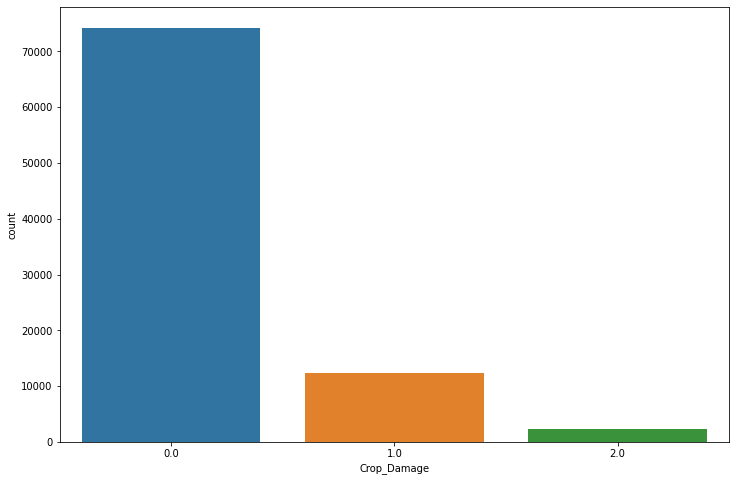

In [14]:
#Count Plot of target
plt.figure(figsize = (12,8))
sns.countplot(x = "Crop_Damage", data = df)

More Crops are alive than dead

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2929a91d10>,
      dtype=object)

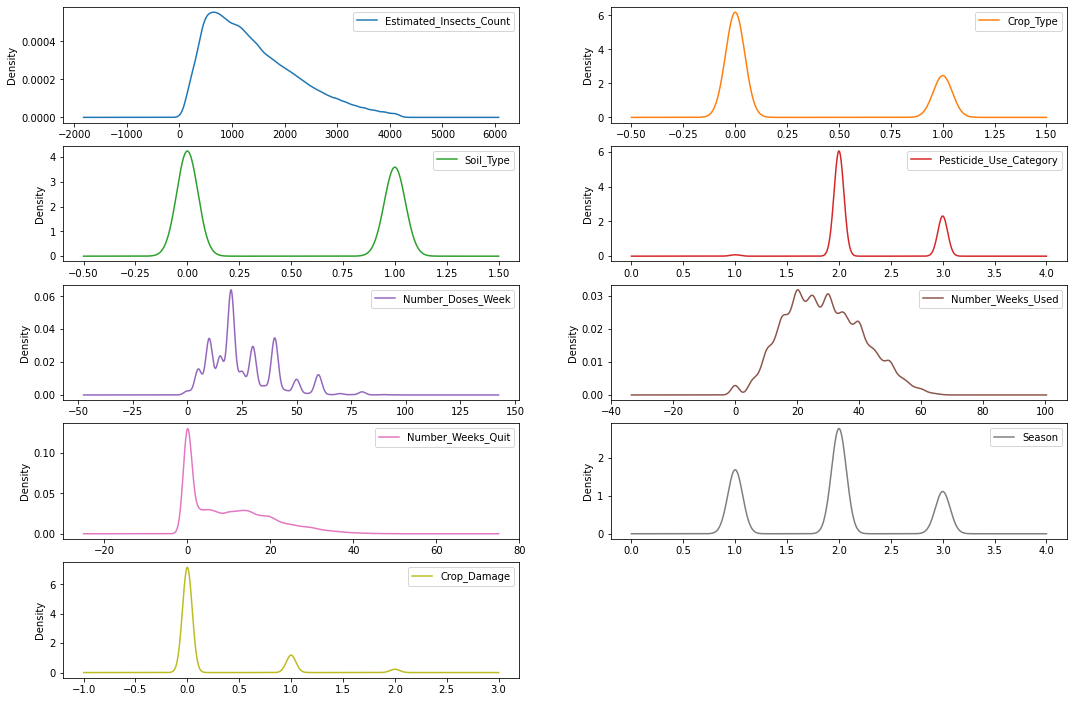

In [15]:
#Density Plot
df.plot(kind='density', subplots=True, layout=(8,2), sharex=False , figsize =(18,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f293493dc50>,
      dtype=object)

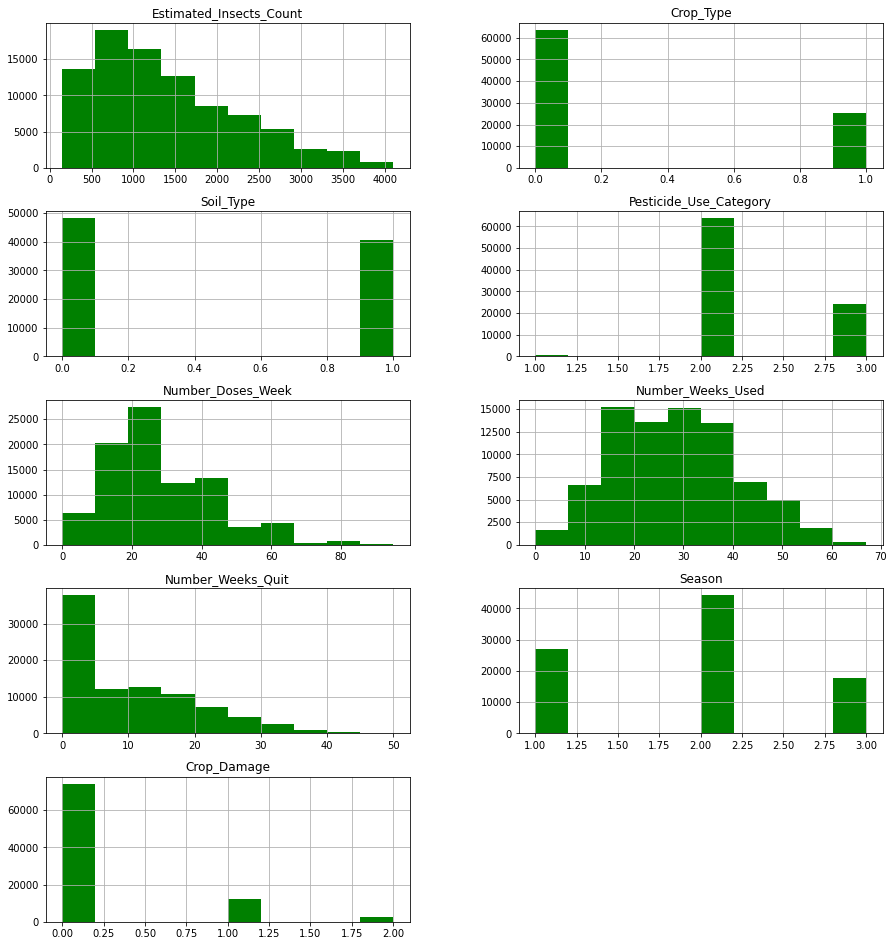

In [16]:
#Histogram of all the features
df.hist(figsize = (15,20), layout = (6,2), bins = 10, color = 'green')

1. Crop damage due to pesticides is very low. So, pesticides is recommended
2. Crop Type 0 will survive more than crop type 1
3. Soil Type is same as for 0 and 1(in the amounts)
4. Pesticide Category 2 is used more than 1 and 3 combined
5. 500 - 1000 sq meter has the highest insects count
6. Number_Weeks_Quit is positive skewed
7. Number_Weeks_Used is approximately normally distributed
8. Estimated Insects Count is right skewed

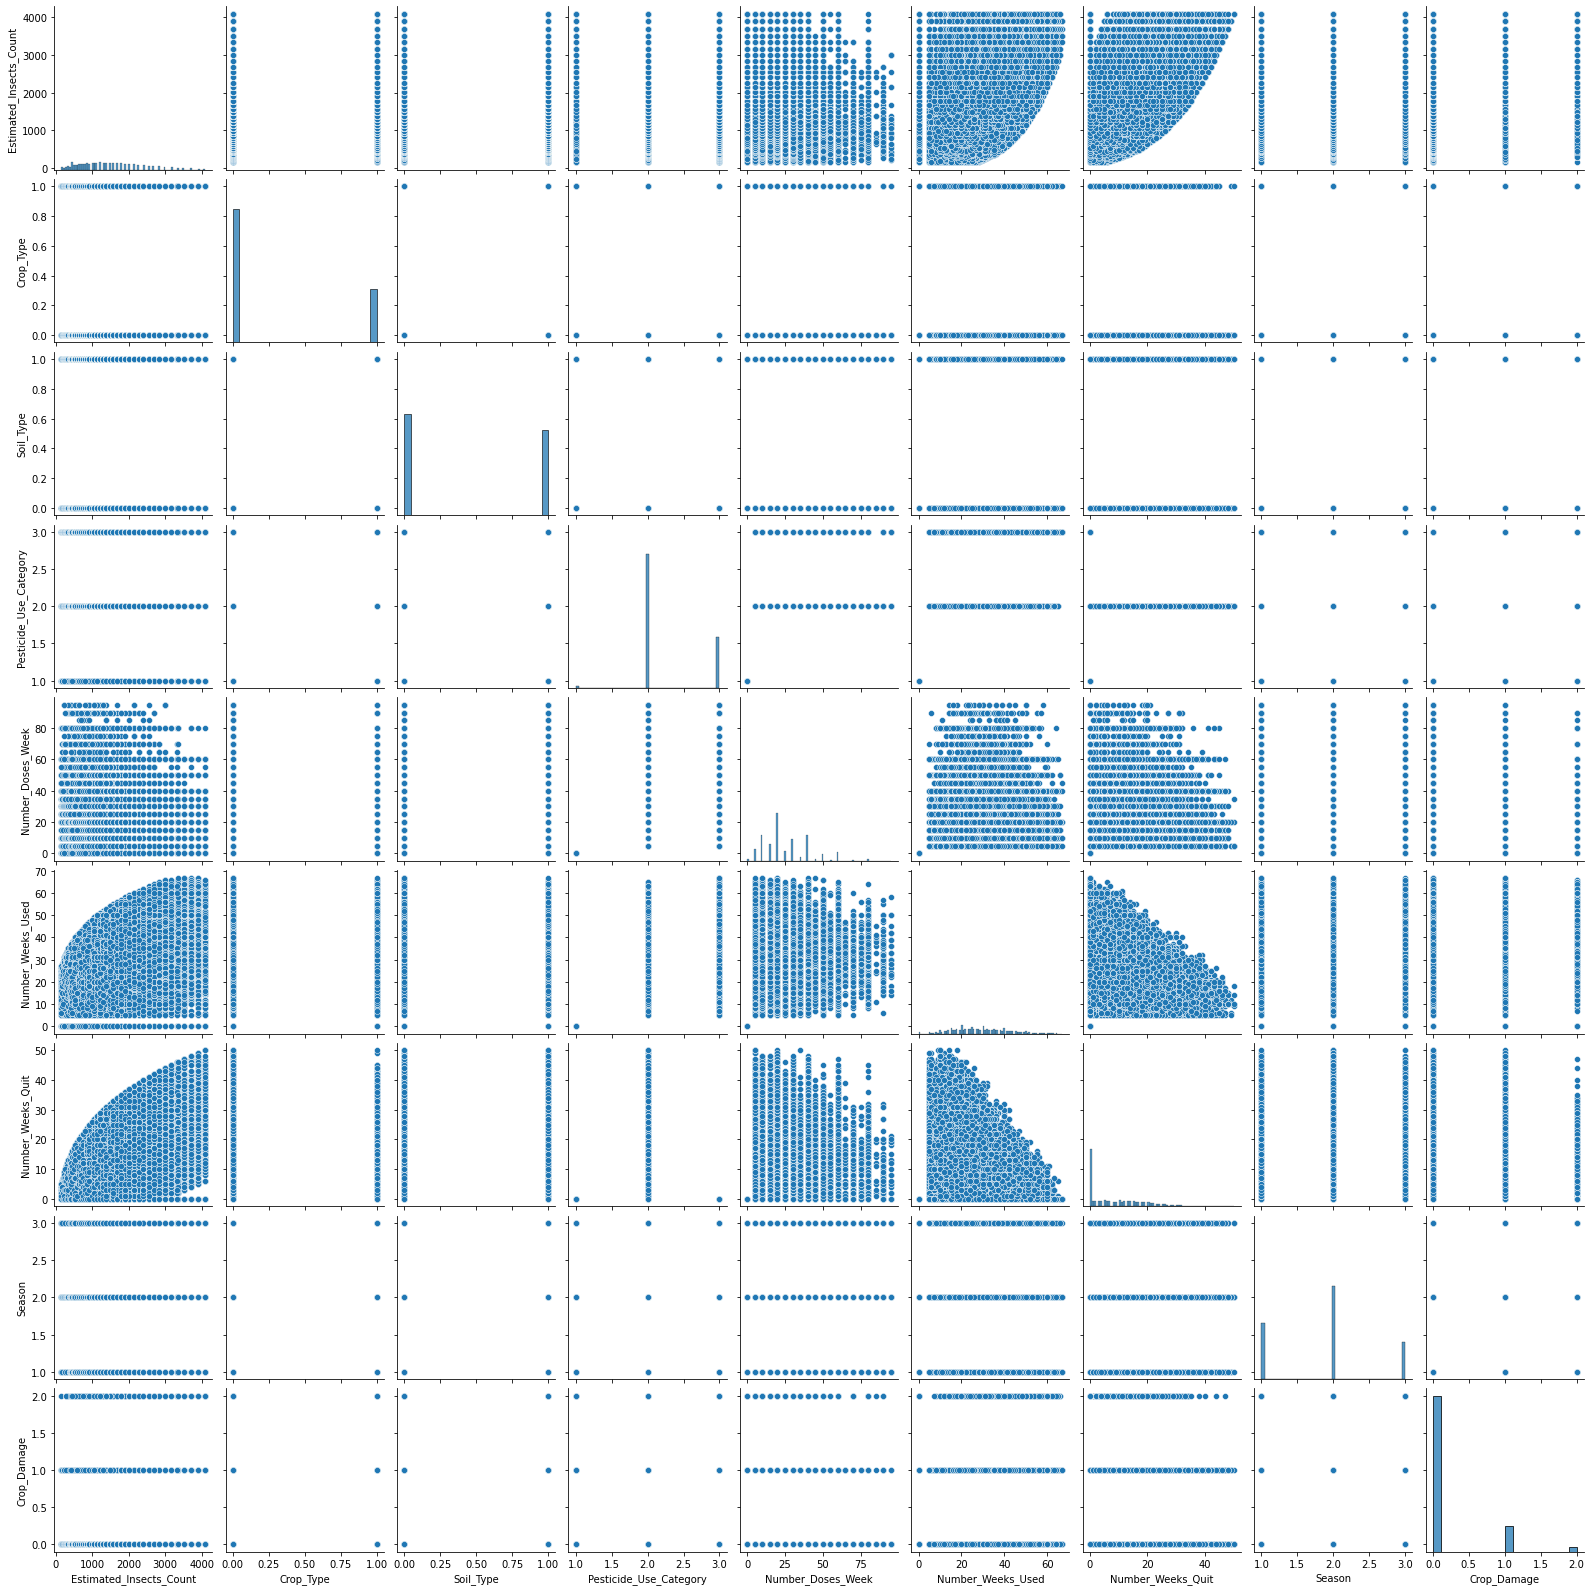

In [17]:
#Pairplot of the dataframe
sns.pairplot(data = df)

Text(0.5, 1.0, 'Crop_Type Grouped Count')

<Figure size 864x576 with 0 Axes>

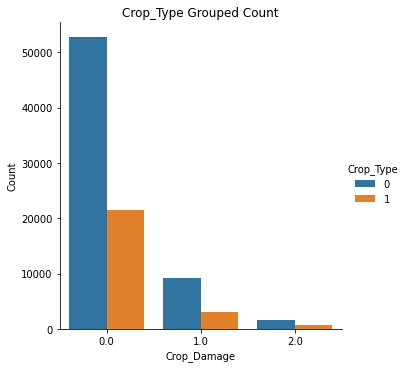

In [18]:
plt.figure(figsize = (12,8))
sns.catplot(x = 'Crop_Damage', data = df, kind = 'count', hue = 'Crop_Type')
plt.xlabel("Crop_Damage")
plt.ylabel("Count")
plt.title("Crop_Type Grouped Count")

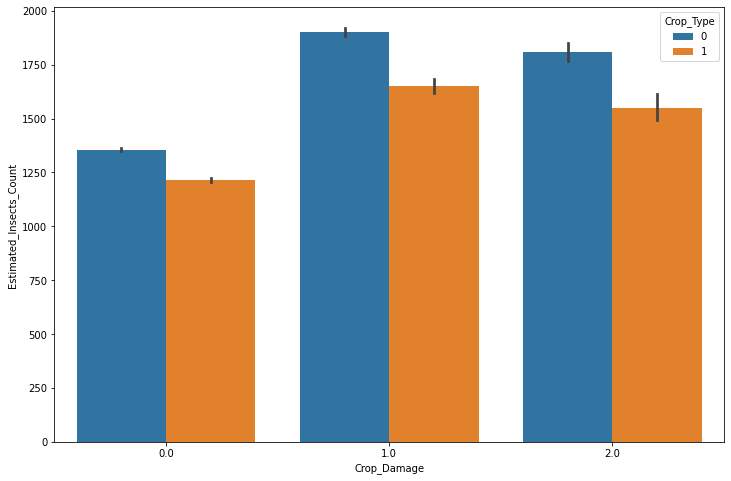

In [19]:
plt.figure(figsize = (12,8))
sns.barplot(x = "Crop_Damage" , y = "Estimated_Insects_Count", hue = "Crop_Type", data = df)

Text(0.5, 1.0, 'Number_Weeks_Quit is moderately positively skewed')

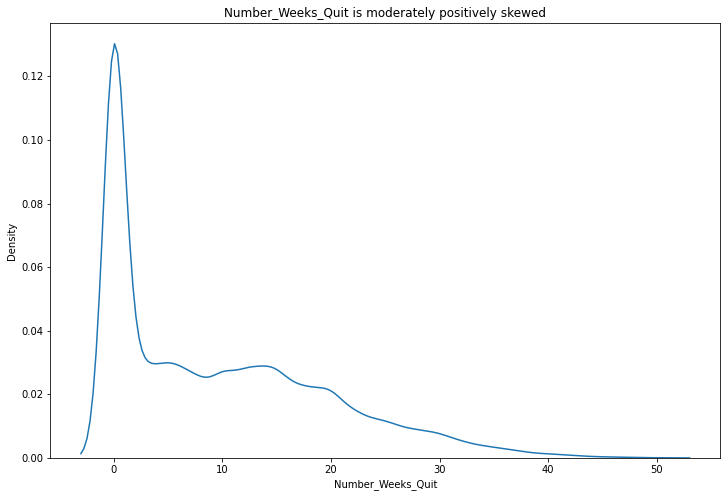

In [20]:
plt.figure(figsize = (12,8))
ax1 = sns.kdeplot(df.Number_Weeks_Quit)
ax1.set_title("Number_Weeks_Quit is moderately positively skewed")

Number_Weeks_Quit is moderately positively skewed

Text(0.5, 1.0, 'Crop_Type is moderately positively skewed')

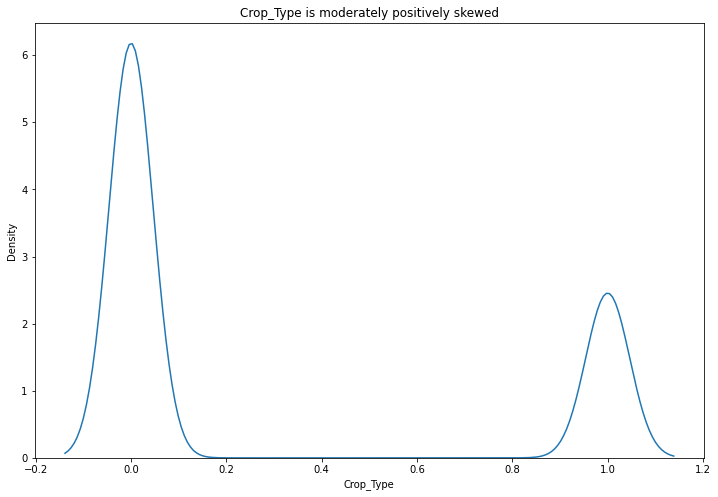

In [21]:
plt.figure(figsize = (12,8))
ax2 = sns.kdeplot(df.Crop_Type);
ax2.set_title("Crop_Type is moderately positively skewed")

Crop_Type is moderately positively skewed

Text(0.5, 1.0, 'Pesticide_Use_Category is moderately positively skewed')

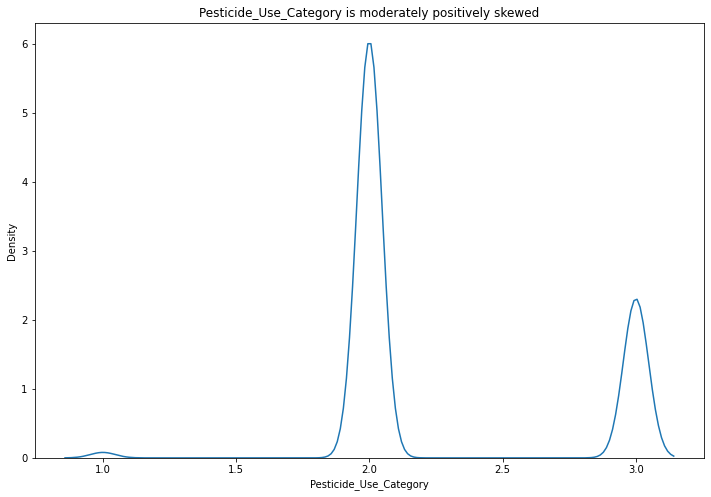

In [22]:
plt.figure(figsize = (12,8))
ax3 = sns.kdeplot(df.Pesticide_Use_Category);
ax3.set_title("Pesticide_Use_Category is moderately positively skewed")

Pesticide_Use_Category is moderately positively skewed

Text(0.5, 1.0, 'Number_Doses_Week is moderately positively skewed')

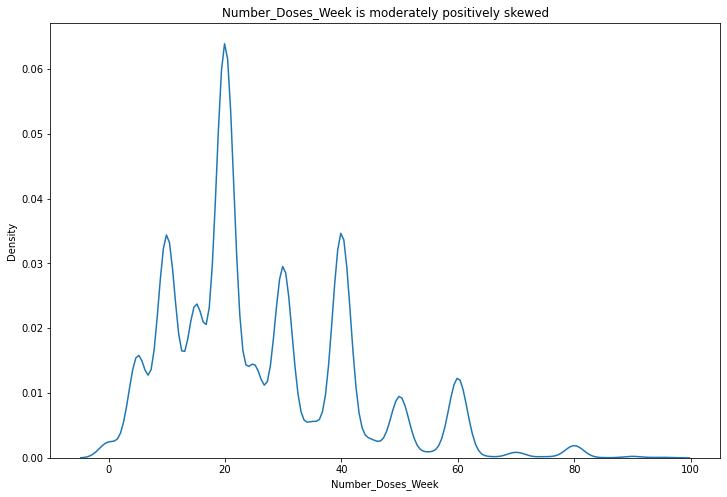

In [23]:
plt.figure(figsize = (12,8))
ax4 = sns.kdeplot(df.Number_Doses_Week);
ax4.set_title("Number_Doses_Week is moderately positively skewed")

Number_Doses_Week is moderately positively skewed

Text(0.5, 1.0, 'Boxplot of Number Weeks Used feature')

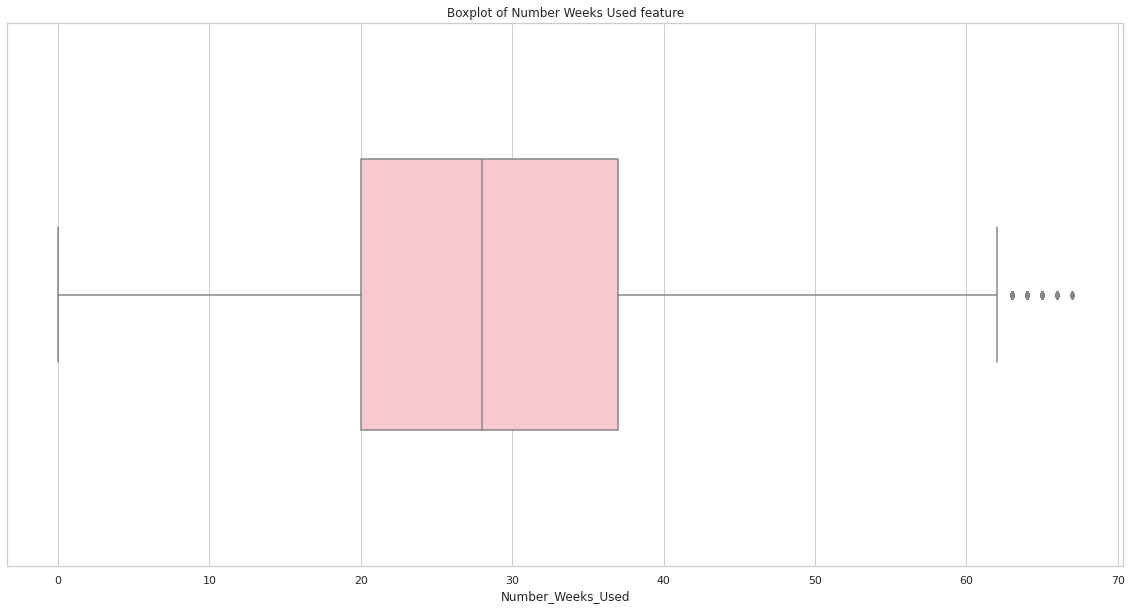

In [24]:
#Boxplot of Number_Weeks_Used
plt.figure(figsize = (20,10))
sns.set_theme(style = "whitegrid")
ax = sns.boxplot(x = df['Number_Weeks_Used'], color = "pink", width = 0.5)
plt.title("Boxplot of Number Weeks Used feature")

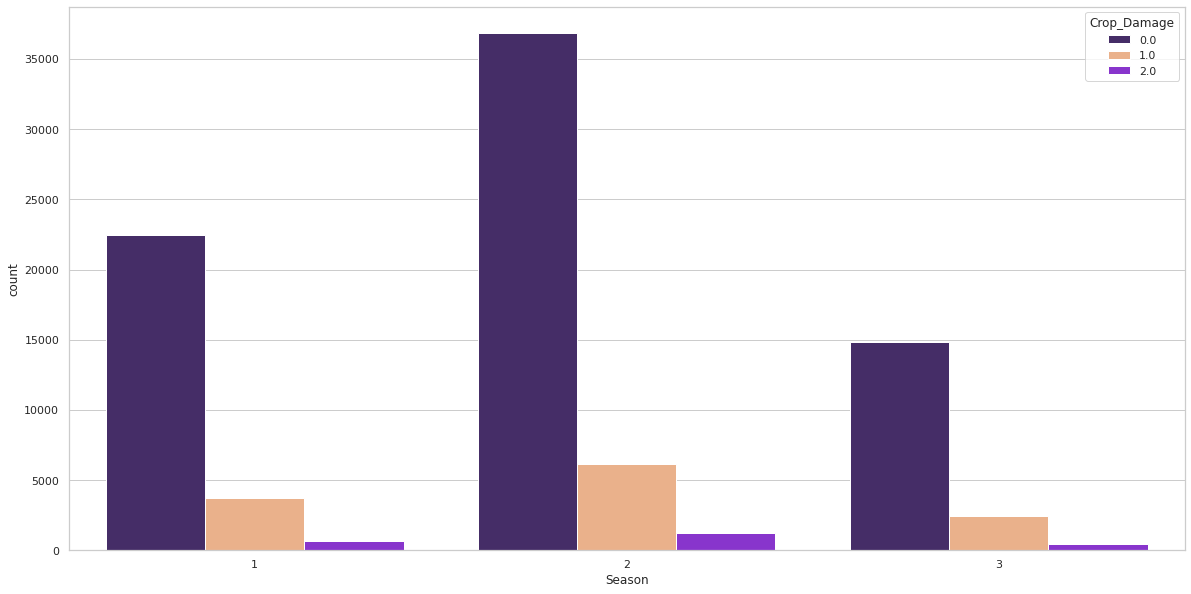

In [25]:
#Countplot of Season with Crop Damage(hue)
plt.figure(figsize=(20,10))
sns.countplot(data = df, x = 'Season', hue = 'Crop_Damage', palette = ['#432371',"#FAAE7B","#8A1CE5"])

Crop Damage due to pesticides is slightly higher in season 2 compared to other seasons

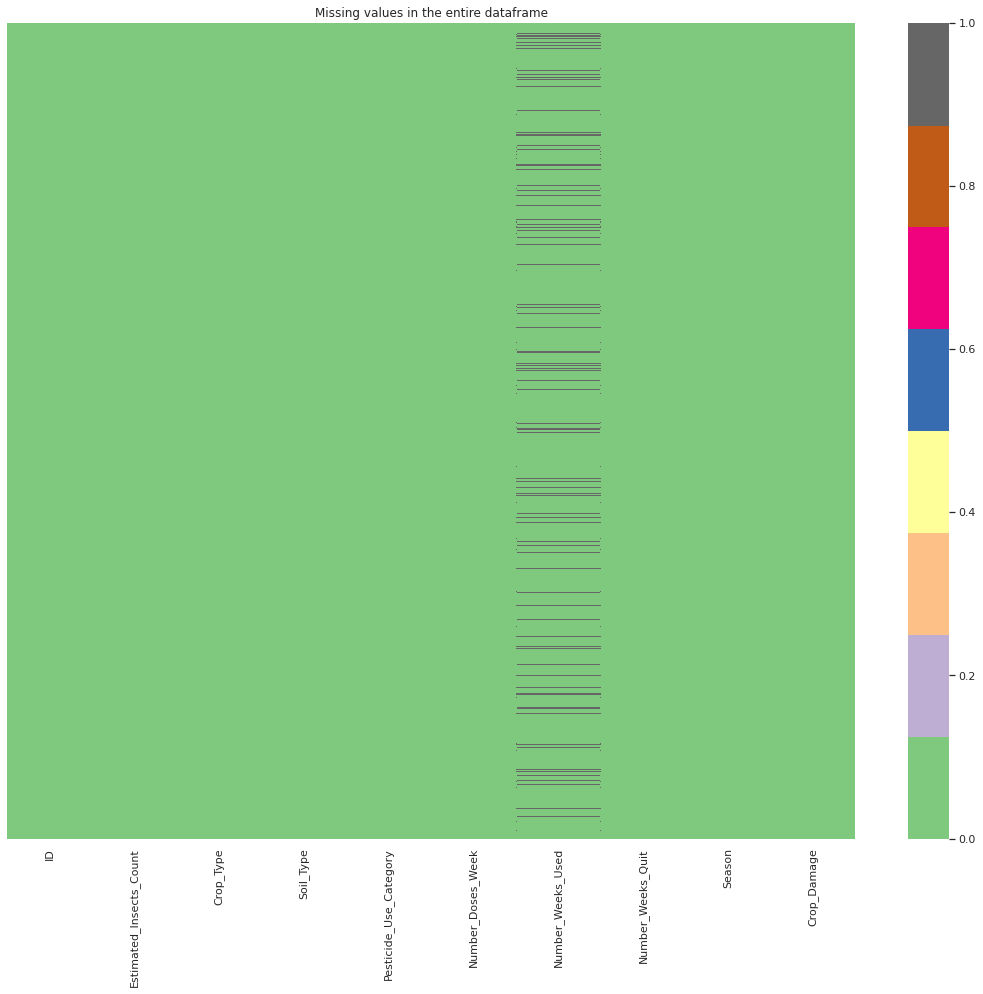

In [26]:
#Visualizing missing data. Plotting to see the missing date for features
plt.figure(figsize=(19, 15))
sns.heatmap(df.isnull(),cmap = 'Accent',cbar = True, yticklabels = False)
plt.title('Missing values in the entire dataframe')
plt.show()

Estimated_Insects_Count       AxesSubplot(0.125,0.787927;0.352273x0.0920732)
Crop_Type                  AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
Soil_Type                     AxesSubplot(0.125,0.677439;0.352273x0.0920732)
Pesticide_Use_Category     AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
Number_Doses_Week             AxesSubplot(0.125,0.566951;0.352273x0.0920732)
Number_Weeks_Used          AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
Number_Weeks_Quit             AxesSubplot(0.125,0.456463;0.352273x0.0920732)
Season                     AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
Crop_Damage                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
dtype: object

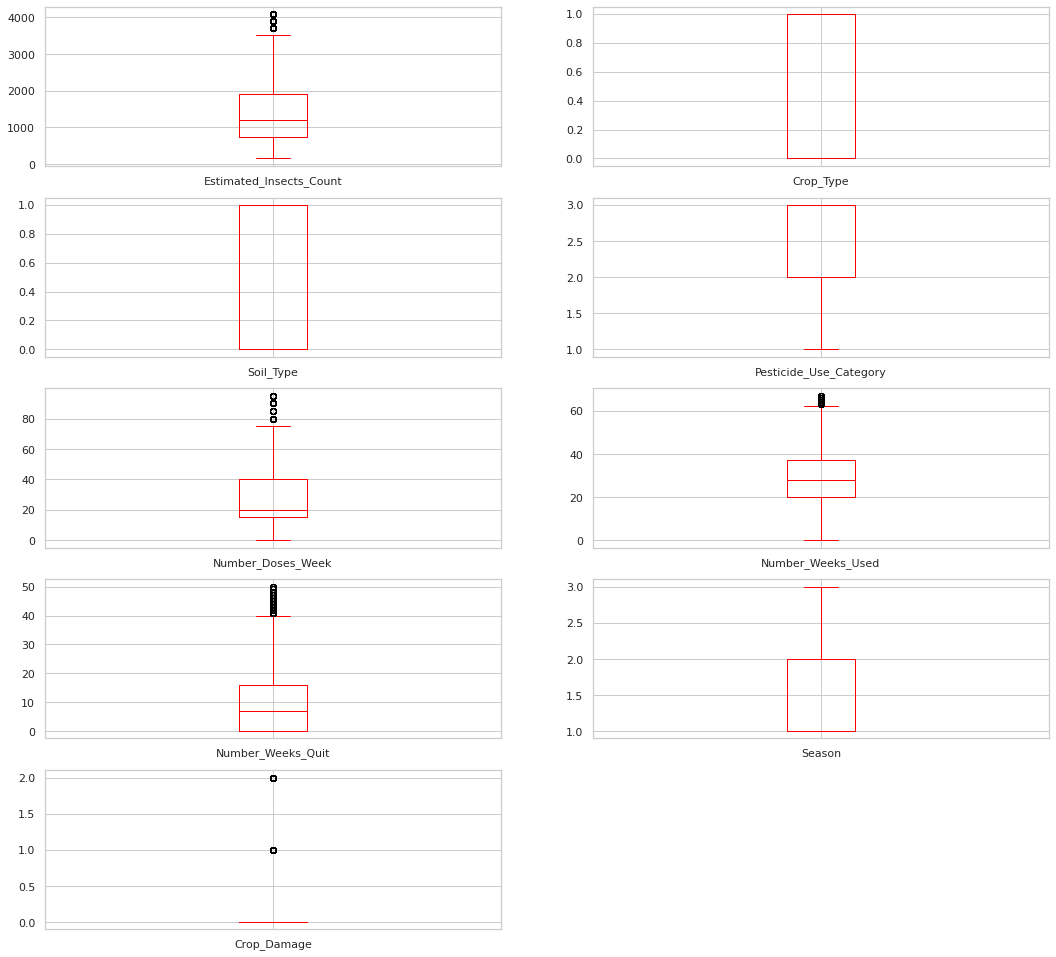

In [27]:
#Box plot
df.plot(kind='box', subplots=True, layout=(7,2), sharex=False,sharey=False ,figsize =(18,24),
        color='red')

## 3. Data Cleaning and Feature Engineering

In [28]:
#Replacing missing values with the mean
df['Number_Weeks_Used'].fillna(df['Number_Weeks_Used'].mean(),inplace = True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        88858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  float64
dtypes: float64(2), int64(7), object(1)
memory usage: 10.0+ MB


**All the missing values are removed**

In [30]:
df.drop(columns = ["ID"], axis = 1, inplace = True)
df.head(10)

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.00000,0,1,0.0
1,209,1,0,1,0,0.00000,0,2,1.0
2,257,1,0,1,0,0.00000,0,2,1.0
3,257,1,1,1,0,0.00000,0,2,1.0
4,342,1,0,1,0,0.00000,0,2,1.0
5,448,0,1,1,0,28.62397,0,2,1.0
6,448,0,1,1,0,28.62397,0,2,1.0
7,577,1,0,1,0,0.00000,0,1,2.0
8,731,0,0,1,0,0.00000,0,2,0.0
9,1132,1,0,1,0,0.00000,0,1,2.0


Making features normally distrubuted

In [31]:
#Checking the skew of each feature
df.skew()

Estimated_Insects_Count    0.839146
Crop_Type                  0.955978
Soil_Type                  0.166914
Pesticide_Use_Category     0.779488
Number_Doses_Week          0.962879
Number_Weeks_Used          0.258007
Number_Weeks_Quit          0.892773
Season                     0.145228
Crop_Damage                2.367816
dtype: float64

As of now, Soil_Type, Number_Weeks_Used, Season are normally distributed

In [32]:
#Function to return plots for the feature
import scipy.stats as stats
import pylab

def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

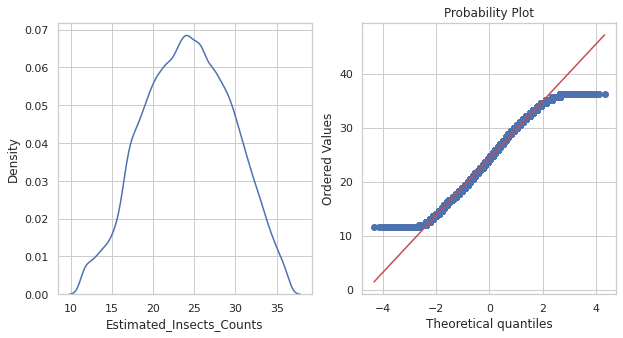

In [33]:
#Converting Estimated Insects Count feature to Normal Distribution using Box-Cox transform
#Plotting to check the transformation
df['Estimated_Insects_Counts'], parameters = stats.boxcox(df['Estimated_Insects_Count'])
normality(df,'Estimated_Insects_Counts')

In [34]:
df[df.index.duplicated()]

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Estimated_Insects_Counts


In [35]:
import numpy as np
df.loc[df['Number_Weeks_Used']>55,'Number_Weeks_Used'] = np.mean(df["Number_Weeks_Used"])

In [36]:
df.loc[df['Estimated_Insects_Count']>3500,'Estimated_Insects_Count'] = np.mean(df["Estimated_Insects_Count"])

In [37]:
df.loc[df['Number_Weeks_Quit']>40,'Number_Weeks_Quit'] = np.mean(df["Number_Weeks_Quit"])

In [38]:
df.loc[df['Number_Doses_Week']>80,'Number_Doses_Week'] = np.mean(df["Number_Doses_Week"])

In [39]:
df.drop(columns = ["Estimated_Insects_Count"], axis = 1, inplace = True)

Number_Doses_Week feature - Tried converting to normal distribution

In [40]:
##df['Number_Doses_Weeks']=np.log(df['Number_Doses_Week'])
##normality(df,'Number_Doses_Weeks')

##df['Number_Doses_Weeks1']=1/df.Number_Doses_Weeks
##normality(df,'Number_Doses_Weeks1')

##df['Number_Doses_Weeks2']=np.sqrt(df.Number_Doses_Weeks)
#normality(df,'Number_Doses_Weeks2')

#df['Number_Doses_Weeks3']=df.Number_Doses_Weeks**(1/1.2)
#normality(df,'Number_Doses_Weeks3')

Number_Doses_Quit feature - Tried converting to normal distribution

In [41]:
##df['Number_Doses_Quit1']=np.log(df['Number_Doses_Quit'])
##normality(df,'Number_Doses_Quit1')

##df['Number_Doses_Quit2']=1/df.Number_Doses_Quit
##normality(df,'Number_Doses_Quit2')

##df['Number_Doses_Quit3']=np.sqrt(df.Number_Doses_Quit)
#normality(df,'Number_Doses_Quit3')

#df['Number_Doses_Quit4']=df.Number_Doses_Quit**(1/1.2)
#normality(df,'Number_Doses_Quit4')

## 4. Feature Scaling, Modelling and Evaluation

In [71]:
#Creating predictors and Target
y = df['Crop_Damage']
X = df.drop(columns = ['Crop_Damage'])

#Performing Train Test split using sklearn library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.65, random_state = 0)

In [72]:
#Verifying shapes of our test train split
print("X_train shape is ", X_train.shape)
print("X_test shape is ", X_test.shape)
print("y_train shape is ", y_train.shape)
print("y_test shape is ", y_test.shape)

X_train shape is  (57757, 8)
X_test shape is  (31101, 8)
y_train shape is  (57757,)
y_test shape is  (31101,)


In [73]:
#We do encoding for nominal data so I used get_dummies method
X_train = pd.get_dummies(data = X_train, columns = ["Season","Pesticide_Use_Category","Soil_Type","Crop_Type"])
X_train.head(10)

,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Estimated_Insects_Counts,Season_1,Season_2,Season_3,Pesticide_Use_Category_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Soil_Type_0,Soil_Type_1,Crop_Type_0,Crop_Type_1
56069,20.0,36.00000,0.0,19.871195,0,0,1,0,0,1,1,0,1,0
49232,20.0,38.00000,3.0,22.047222,0,1,0,0,1,0,1,0,1,0
75787,40.0,23.00000,39.0,35.644641,1,0,0,0,1,0,0,1,1,0
20300,20.0,30.00000,18.0,35.059264,0,0,1,0,1,0,1,0,0,1
55416,10.0,42.00000,8.0,29.300122,1,0,0,0,1,0,0,1,1,0
48927,55.0,28.62397,0.0,25.356184,0,0,1,0,0,1,1,0,0,1
41837,20.0,32.00000,17.0,25.914142,0,0,1,0,1,0,1,0,1,0
80645,5.0,10.00000,37.0,29.295601,1,0,0,0,1,0,0,1,1,0
50713,5.0,18.00000,20.0,23.140164,1,0,0,0,1,0,1,0,0,1
1017,80.0,41.00000,4.0,24.796945,0,1,0,0,1,0,1,0,1,0


In [74]:
#Let us normalize values for features(Number_Doses_Week,	Number_Weeks_Used,	Number_Weeks_Quit,	Estimated_Insects_Counts)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [75]:
#Checking normalized values by creating a dataframe
from pandas import DataFrame
X_train_df = DataFrame(X_train)
X_train_df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.2500,0.654545,0.000,0.338342,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.2500,0.690909,0.075,0.426355,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.5000,0.418182,0.975,0.976329,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.2500,0.545455,0.450,0.952652,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.1250,0.763636,0.200,0.719713,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
5,0.6875,0.520436,0.000,0.560193,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
6,0.2500,0.581818,0.425,0.582760,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
7,0.0625,0.181818,0.925,0.719530,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
8,0.0625,0.327273,0.500,0.470562,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
9,1.0000,0.745455,0.100,0.537573,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [76]:
#Performed feature encoding to the X_test feature using get_dummies and then transformed
X_test = pd.get_dummies(data = X_test, columns=["Season","Pesticide_Use_Category","Soil_Type","Crop_Type"])
X_test = scaler.transform(X_test)

In [77]:
#Creating a dataframe from normalized values of test dataset
X_test_df = DataFrame(X_test)
X_test_df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.2500,0.454545,0.650,0.788818,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.1875,0.345455,0.425,0.448380,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.1250,0.520436,0.900,0.905624,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.1250,0.581818,0.225,0.492849,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.4375,0.520436,0.000,0.492849,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
5,0.0625,0.454545,0.000,0.359942,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
6,0.2500,0.381818,0.100,0.208645,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7,0.7500,0.527273,0.000,0.404198,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
8,0.3750,0.854545,0.000,0.470562,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
9,0.3125,0.581818,0.075,0.294901,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [78]:
#Using this class to make my print statement look bold
class color:
    BOLD = '\033[1m'

## 4.1.Machine Learning

### Decision Trees


Accuracy: 0.75110125

F1 Score:  0.39807723

Precision:  0.39565173

Recall:  0.40116291

Confusion Matrix
  [[22154  3274   576]
 [ 2867  1136   287]
 [  467   270    70]]

AUC score:  0.5766074853113111

Feature Importance:  [0.1297885059766685, 0.24113333877340495, 0.11796474896297597, 0.28785998409205915, 0.032443773639156376, 0.03289273491577262, 0.03139324714839423, 0.008388124018325475, 0.05175344817276788, 0.0, 0.020760583223676406, 0.020335957328333144, 0.01534998287880557, 0.009935570869659526]


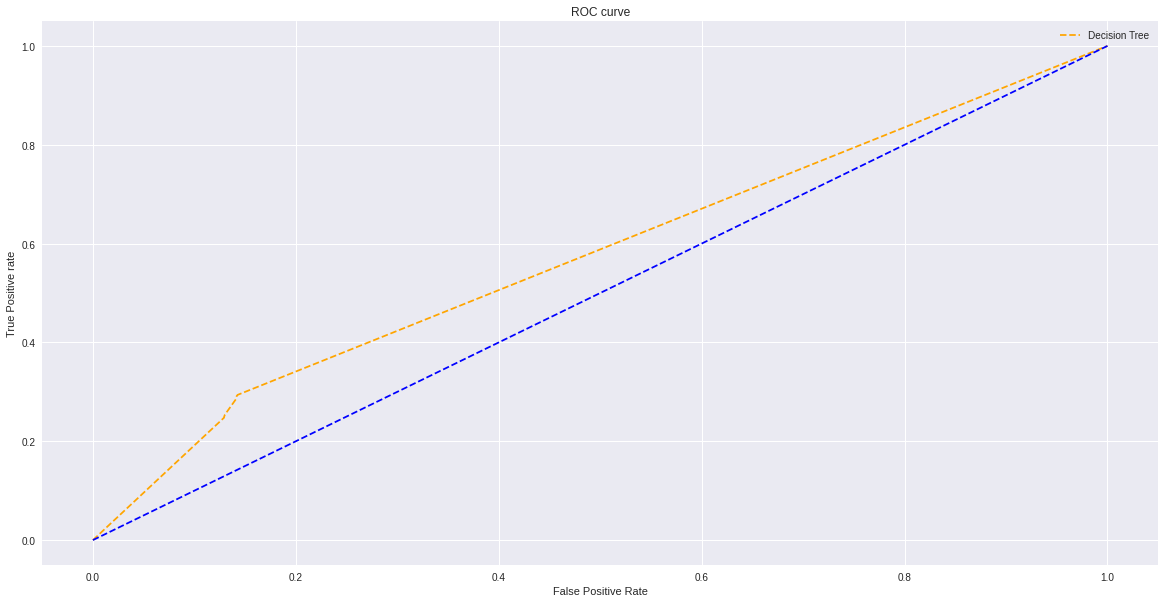

In [80]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

#Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state = 42)

#Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_dt = clf.predict(X_test)
predictions = [round(value) for value in y_pred_dt]

accuracies = {}

dt_accuracy = round(accuracy_score(y_test, y_pred_dt),8)
print(color.BOLD + "\nAccuracy:", dt_accuracy)

accuracies['Decision Tree'] = dt_accuracy

print("\nF1 Score: ", round(f1_score(y_test, y_pred_dt, average = "macro"),8))

print("\nPrecision: ", round(precision_score(y_test, y_pred_dt, average = "macro"),8))

print("\nRecall: ", round(recall_score(y_test, y_pred_dt, average = "macro"),8)) 

cm = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix\n ", cm)

#ROC AUC
pred_prob = clf.predict_proba(X_test)
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label = 1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score
# auc scores
auc_score = roc_auc_score(y_test, pred_prob, multi_class = 'ovr')

print("\nAUC score: ", auc_score)

import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle = '--', color = 'orange', label = 'Decision Tree')
plt.plot(p_fpr, p_tpr, linestyle = '--', color = 'blue')

# title
plt.title('ROC curve')

# x label
plt.xlabel('False Positive Rate')

# y label
plt.ylabel('True Positive rate')
plt.legend(loc = 'best')

#Feature Importances
print("\nFeature Importance: ", clf.feature_importances_.tolist())

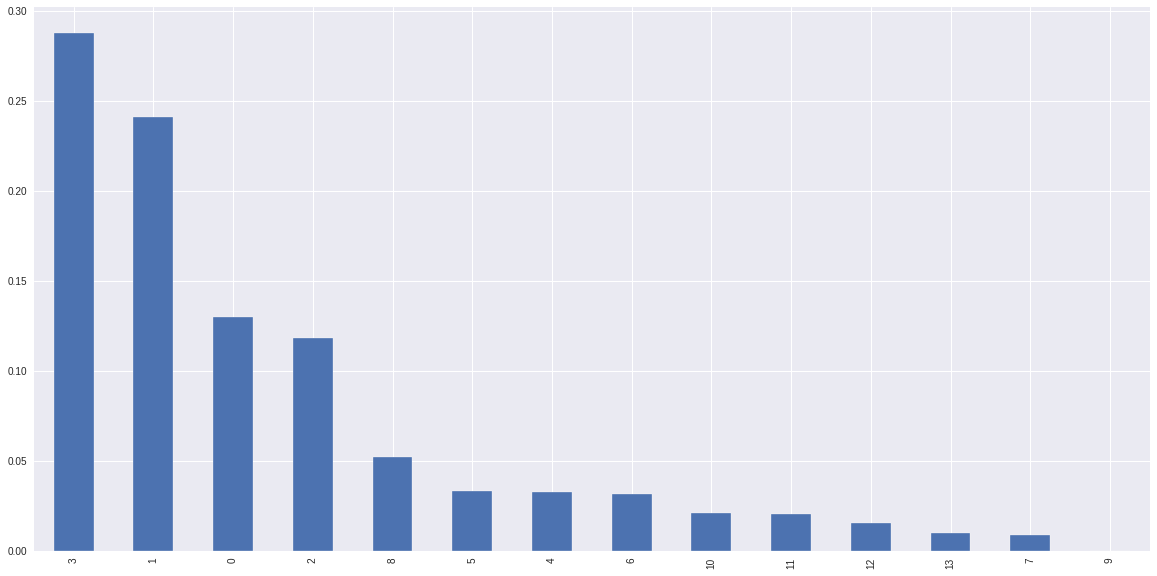

In [81]:
#Graph of feature importances
plt.figure(figsize = (20,10))
feat_importances = pd.Series(clf.feature_importances_)
feat_importances.nlargest(20).plot(kind = 'bar')


Accuracy: 0.8410662

F1 Score:  0.33263613

Precision:  0.50543281

Recall:  0.34776464

Confusion Matrix
  [[25966    38     0]
 [ 4098   192     0]
 [  752    55     0]]

AUC score:  0.7500923324240185

Feature Importance:  [0.20113459086535562, 0.07683969213272301, 0.23780472022547725, 0.2657436746169996, 0.0002542041431316182, 0.0005149146339208158, 0.0, 0.0, 0.21178652518823574, 0.0, 0.0005361273900612283, 0.0, 0.00111136844153615, 0.004274182362558808]


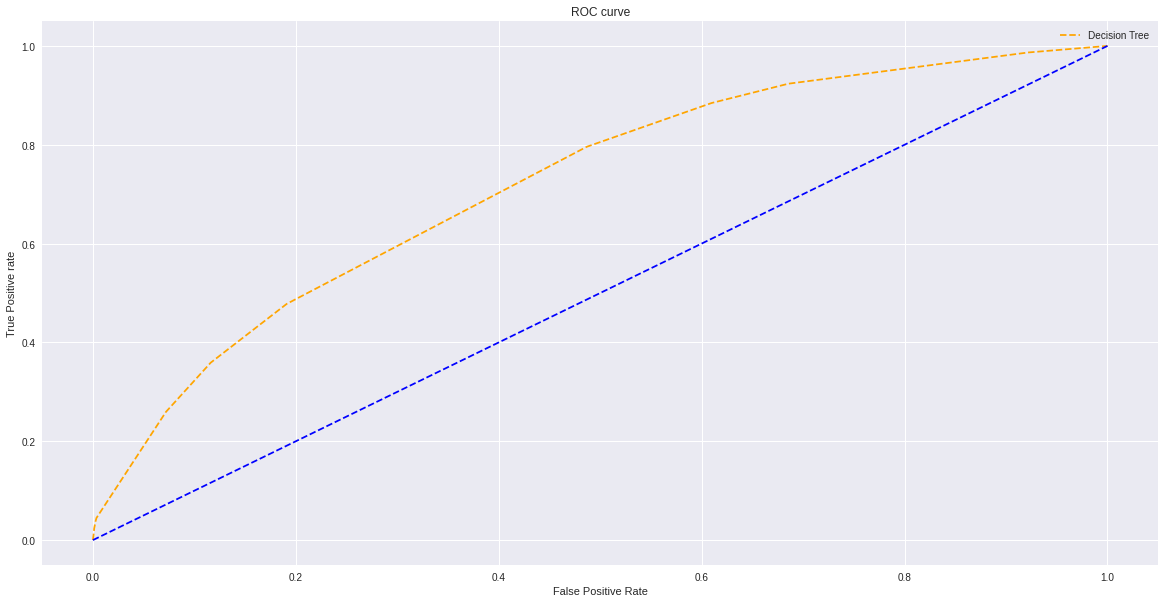

In [82]:
#Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth= 4, max_features = 3, min_samples_leaf= 12, random_state = 42)

#Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_dt = clf.predict(X_test)
predictions = [round(value) for value in y_pred_dt]

accuracies = {}

dt_accuracy = round(accuracy_score(y_test, y_pred_dt),8)
print(color.BOLD + "\nAccuracy:", dt_accuracy)

accuracies['Decision Tree'] = dt_accuracy

print("\nF1 Score: ", round(f1_score(y_test, y_pred_dt, average = "macro"),8))

print("\nPrecision: ", round(precision_score(y_test, y_pred_dt, average = "macro"),8))

print("\nRecall: ", round(recall_score(y_test, y_pred_dt, average = "macro"),8)) 

cm = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix\n ", cm)

#ROC AUC
pred_prob = clf.predict_proba(X_test)
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label = 1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score
# auc scores
auc_score = roc_auc_score(y_test, pred_prob, multi_class = 'ovr')

print("\nAUC score: ", auc_score)

import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle = '--', color = 'orange', label = 'Decision Tree')
plt.plot(p_fpr, p_tpr, linestyle = '--', color = 'blue')

# title
plt.title('ROC curve')

# x label
plt.xlabel('False Positive Rate')

# y label
plt.ylabel('True Positive rate')
plt.legend(loc = 'best')

#Feature Importances
print("\nFeature Importance: ", clf.feature_importances_.tolist())

### Random Forests

Accuracy: 0.84232018

F1 Score:  0.347698

Precision:  0.60340877

Recall:  0.35558602

Confusion Matrix
  [[25918    84     2]
 [ 4008   274     8]
 [  726    76     5]]

AUC score:  0.8016791346462223


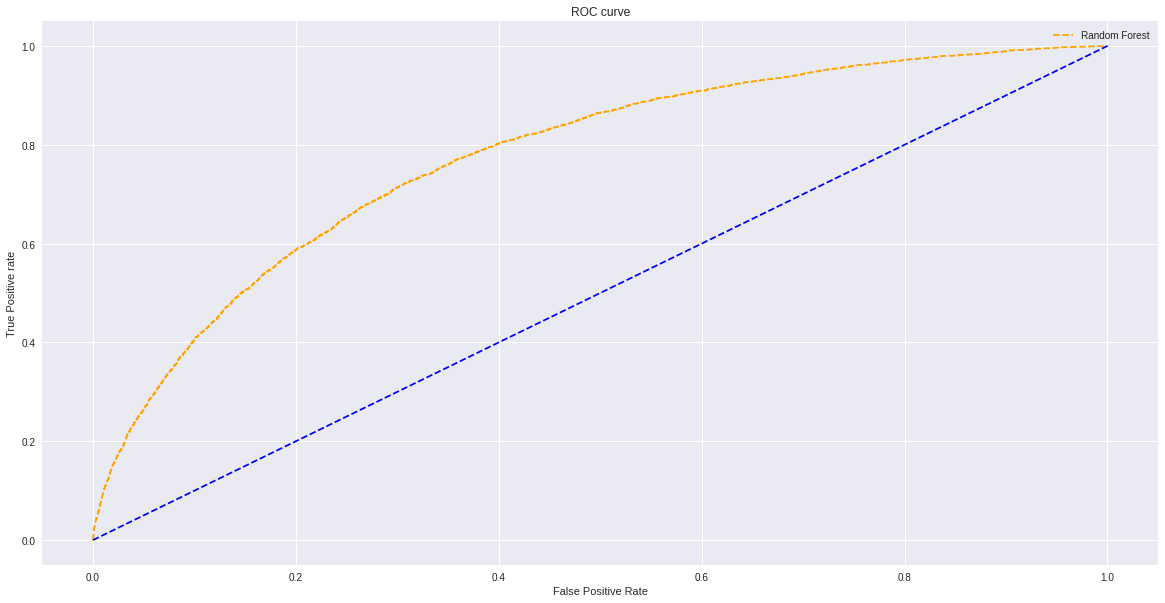

In [ ]:
#Random forests is a technique of bagging where in bootstrapping is performed by distributing features to various models that are created
#Then Aggregation takes the majority as the output
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 750, 
                            criterion = "entropy", 
                            random_state = 42,
                            max_depth = 9, 
                            min_samples_split = 2,  
                            min_samples_leaf = 3)

rf = rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
predictions = [round(value) for value in y_pred_rf]

rf_accuracy = round(accuracy_score(y_test, y_pred_rf),8)
print(color.BOLD + "Accuracy:", rf_accuracy)

accuracies['Random Forest'] = rf_accuracy

print("\nF1 Score: ", round(f1_score(y_test, y_pred_rf, average = "macro"),8))

print("\nPrecision: ", round(precision_score(y_test, y_pred_rf, average = "macro"),8))

print("\nRecall: ", round(recall_score(y_test, y_pred_rf, average = "macro"),8)) 

cm = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix\n ", cm)

#ROC AUC
pred_prob = rf.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label = 1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc scores
auc_score = roc_auc_score(y_test, pred_prob, multi_class = 'ovr')

print("\nAUC score: ", auc_score)

plt.figure(figsize = (20,10))
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle = '--', color = 'orange', label = 'Random Forest')
plt.plot(p_fpr, p_tpr, linestyle = '--', color = 'blue')

# title
plt.title('ROC curve')

# x label
plt.xlabel('False Positive Rate')

# y label
plt.ylabel('True Positive rate')
plt.legend(loc = 'best')


Feature Importance:  [0.10129408746959286, 0.20936439983077973, 0.11054086918390083, 0.25995839295323314, 0.005954145204730553, 0.006081942185882278, 0.005480594658323592, 0.03450292445339963, 0.12821499271589032, 0.08213521480815764, 0.00796952040231385, 0.00871527190987044, 0.02017442639531518, 0.019613217828609912]


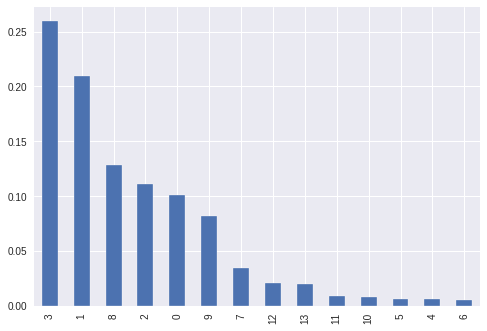

In [ ]:
#Feature Importances
print("\nFeature Importance: ", rf.feature_importances_.tolist())

#Graph of feature importances
feat_importances = pd.Series(rf.feature_importances_)
feat_importances.nlargest(20).plot(kind = 'bar')

### XG BOOST

Accuracy: 0.84756117

F1 Score:  0.80169694

Precision:  0.79707027

Recall:  0.84756117

Confusion Matrix
  [[25693   311     0]
 [ 3623   667     0]
 [  631   176     0]]

AUC score:  0.8088734916263913


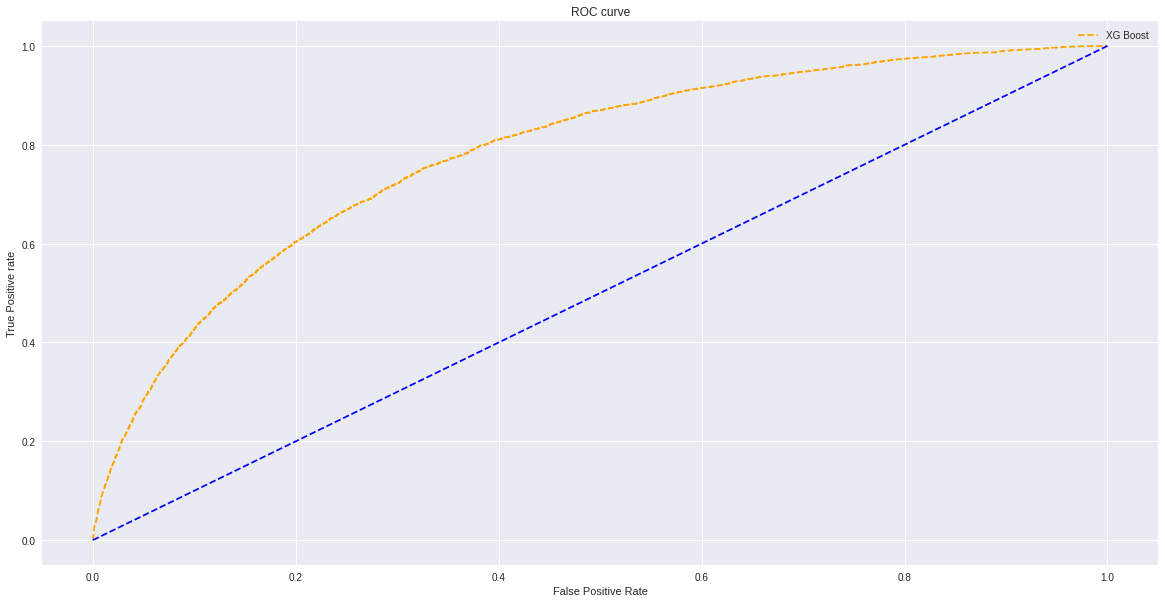

In [ ]:
#Boosting techniques combine weak learners to form strong classifiers
from xgboost import XGBClassifier

xg = XGBClassifier(max_depth = 3,
                   min_child_weight = 1,
                   n_estimators = 250,
                   alpha = 0.1)

xg = xg.fit(X_train, y_train)

y_pred_xg = xg.predict(X_test)
predictions = [round(value) for value in y_pred_xg]

xg_accuracy = round(accuracy_score(y_test, y_pred_xg),8)
print(color.BOLD + "Accuracy:", xg_accuracy)

accuracies['XG Boost'] = xg_accuracy

print("\nF1 Score: ", round(f1_score(y_test, y_pred_xg, average = "weighted"),8))

print("\nPrecision: ", round(precision_score(y_test, y_pred_xg, average = "weighted"),8))

print("\nRecall: ", round(recall_score(y_test, y_pred_xg, average = "weighted"),8)) 

cm = confusion_matrix(y_test, y_pred_xg)
print("\nConfusion Matrix\n ", cm)

#ROC AUC
pred_prob = xg.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label = 1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc scores
auc_score = roc_auc_score(y_test, pred_prob, multi_class = "ovr")

print("\nAUC score: ", auc_score)

plt.figure(figsize = (20,10))
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle = '--', color = 'orange', label = 'XG Boost')
plt.plot(p_fpr, p_tpr, linestyle = '--', color = 'blue')

# title
plt.title('ROC curve')

# x label
plt.xlabel('False Positive Rate')

# y label
plt.ylabel('True Positive rate')
plt.legend(loc = 'best')

In [ ]:
# Import necessary modules
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "min_child_weight": [1, None],
              "alpha":[0.1, None]}

# Instantiate a Decision Tree classifier: xgb
xgb = XGBClassifier()

# Instantiate the RandomizedSearchCV object: xgb_cv
xgb_cv = RandomizedSearchCV(xgb, param_dist, cv=7)

# Fit it to the data
xgb_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("\nTuned XG Boost Parameters: {}".format(xgb_cv.best_params_))
print("\nBest score is {}".format(xgb_cv.best_score_))


Tuned XG Boost Parameters: {'min_child_weight': 1, 'max_depth': 3, 'alpha': 0.1}

Best score is 0.8429108160049864



Feature Importances:  [0.10938169807195663, 0.0866786390542984, 0.027605215087532997, 0.11529813706874847, 0.006467331666499376, 0.015160809271037579, 0.011996779590845108, 0.0, 0.4827427864074707, 0.02368895336985588, 0.03868532553315163, 0.0, 0.08229431509971619, 0.0]


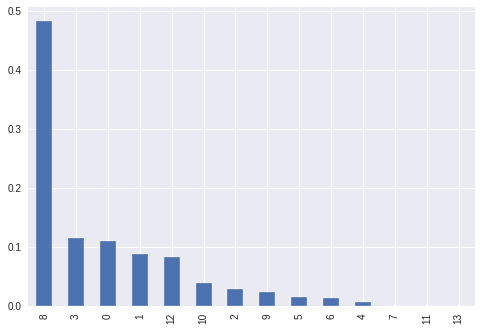

In [ ]:
#Feature Importances
print("\nFeature Importances: ", xg.feature_importances_.tolist())

#Graph of feature importances
feat_importances = pd.Series(xg.feature_importances_,)
feat_importances.nlargest(20).plot(kind='bar')

### Logistic Regression

Accuracy: 0.83945854

F1 Score:  0.37124241

Precision:  0.44582582

Recall:  0.36983225

Confusion Matrix
  [[25566   438     0]
 [ 3748   542     0]
 [  669   138     0]]

AUC score:  0.7853194148068159


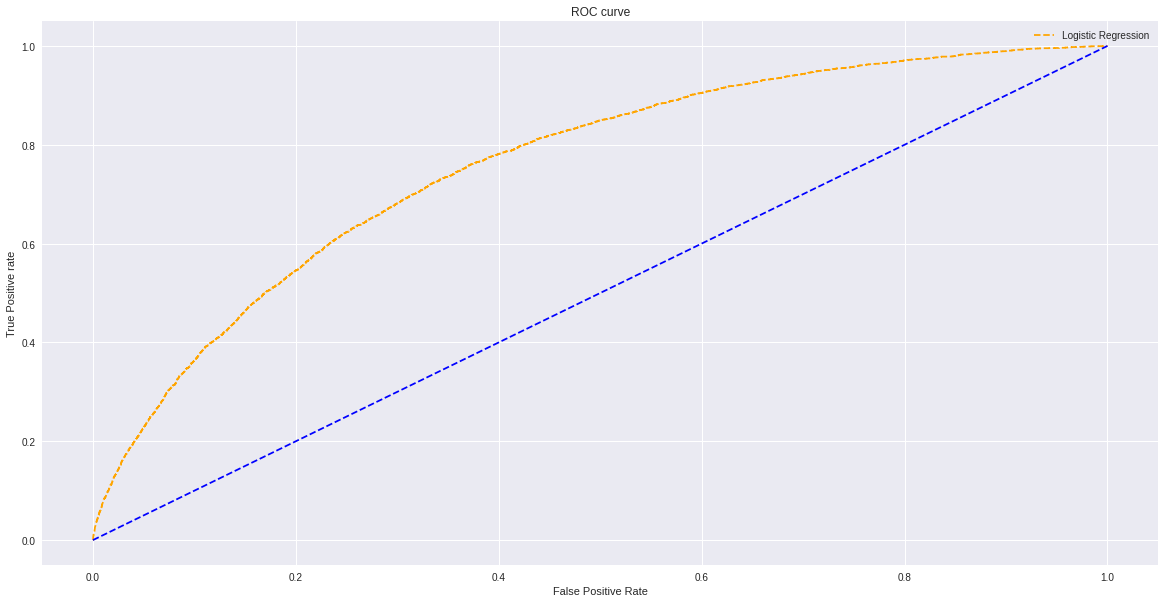

In [83]:
#Logistic Regression is robust to outliers. It uses sigmoid curve to convert values, underneath a logit function is used
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter = 2000,
                            C = 1,
                            multi_class = 'ovr')


logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)
predictions = [round(value) for value in y_pred_logreg]

logreg_accuracy = round(accuracy_score(y_test, y_pred_logreg),8)
print(color.BOLD + "Accuracy:", logreg_accuracy)

accuracies['Logistic Regression'] = logreg_accuracy

print("\nF1 Score: ", round(f1_score(y_test, y_pred_logreg, average = "macro"),8))

print("\nPrecision: ", round(precision_score(y_test, y_pred_logreg, average = "macro"),8))

print("\nRecall: ", round(recall_score(y_test, y_pred_logreg, average = "macro"),8)) 

cm = confusion_matrix(y_test, y_pred_logreg)
print("\nConfusion Matrix\n ", cm)

#ROC AUC
pred_prob = logreg.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label = 1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc scores
auc_score = roc_auc_score(y_test, pred_prob, multi_class = "ovr")

print("\nAUC score: ", auc_score)

plt.figure(figsize = (20,10))
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle = '--', color = 'orange', label = 'Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle = '--', color = 'blue')

# title
plt.title('ROC curve')

# x label
plt.xlabel('False Positive Rate')

# y label
plt.ylabel('True Positive rate')
plt.legend(loc = 'best')

### CatBoost

     |████████████████████████████████| 76.3 MB 48 kB/s 
0:	learn: 0.5009958	total: 69ms	remaining: 24.1s
1:	learn: 0.4653801	total: 87.9ms	remaining: 15.3s
2:	learn: 0.4494245	total: 108ms	remaining: 12.5s
3:	learn: 0.4430261	total: 133ms	remaining: 11.5s
4:	learn: 0.4398291	total: 151ms	remaining: 10.4s
5:	learn: 0.4373035	total: 171ms	remaining: 9.8s
6:	learn: 0.4350088	total: 188ms	remaining: 9.23s
7:	learn: 0.4339073	total: 207ms	remaining: 8.83s
8:	learn: 0.4320289	total: 225ms	remaining: 8.52s
9:	learn: 0.4313547	total: 243ms	remaining: 8.27s
10:	learn: 0.4301780	total: 263ms	remaining: 8.1s
11:	learn: 0.4291291	total: 287ms	remaining: 8.09s
12:	learn: 0.4283903	total: 306ms	remaining: 7.94s
13:	learn: 0.4277917	total: 323ms	remaining: 7.76s
14:	learn: 0.4269515	total: 343ms	remaining: 7.66s
15:	learn: 0.4260936	total: 365ms	remaining: 7.62s
16:	learn: 0.4254946	total: 382ms	remaining: 7.48s
17:	learn: 0.4248791	total: 401ms	remaining: 7.4s
18:	learn: 0.4244685	total: 420ms	rema

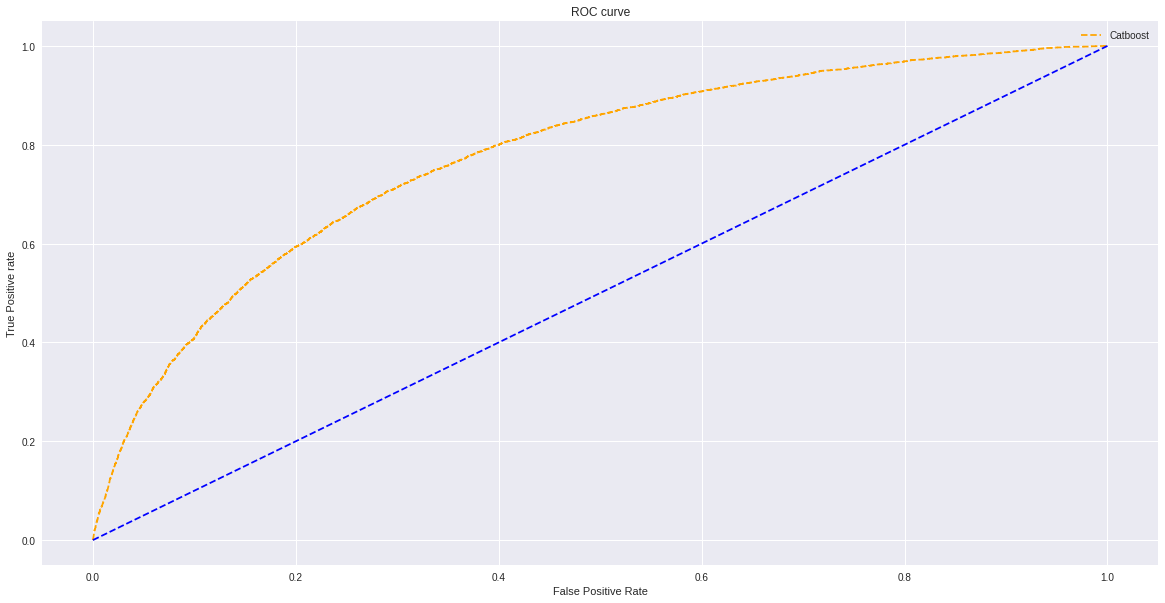

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier

# Initialize CatBoostClassifier
cb = CatBoostClassifier(max_depth = 3 ,n_estimators = 350, learning_rate = 1)

# Fit model
cb.fit(X_train, y_train)

y_pred_cb = cb.predict(X_test)

cb_accuracy = round(accuracy_score(y_test, y_pred_cb),8)
print(color.BOLD + "\nAccuracy:", cb_accuracy)

accuracies['Catboost Classifier'] = cb_accuracy

print("\nF1 Score: ", round(f1_score(y_test, y_pred_cb, average = "macro"),8))

print("\nPrecision: ", round(precision_score(y_test, y_pred_cb, average = "macro"),8))

print("\nRecall: ", round(recall_score(y_test, y_pred_cb, average = "macro"),8)) 

cm = confusion_matrix(y_test, y_pred_cb)
print("\nConfusion Matrix\n ", cm)

#ROC AUC
pred_prob = cb.predict_proba(X_test)
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label = 1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score
# auc scores
auc_score = roc_auc_score(y_test, pred_prob, multi_class = "ovr")

print("\nAUC score: ", auc_score)

import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle = '--', color = 'orange', label = 'Catboost')
plt.plot(p_fpr, p_tpr, linestyle = '--', color = 'blue')

# title
plt.title('ROC curve')

# x label
plt.xlabel('False Positive Rate')

# y label
plt.ylabel('True Positive rate')
plt.legend(loc = 'best')

In [ ]:
from sklearn.model_selection import cross_val_score

#Instantiate CatBoostClassifier, using a maximum depth of 3
cbc = CatBoostClassifier(max_depth = 3)

# 5 folds, scored on accuracy
cvs = cross_val_score(cbc, X, y, cv = 5, scoring ='accuracy')

#Mean value of cross validation score
print ("The mean value of cross val score is ", cvs.mean())

print("======="*5)

Streaming output truncated to the last 5000 lines.
6:	learn: 0.6546661	total: 193ms	remaining: 27.4s
7:	learn: 0.6278897	total: 225ms	remaining: 27.9s
8:	learn: 0.6042908	total: 248ms	remaining: 27.3s
9:	learn: 0.5840575	total: 284ms	remaining: 28.1s
10:	learn: 0.5668421	total: 308ms	remaining: 27.7s
11:	learn: 0.5518396	total: 331ms	remaining: 27.2s
12:	learn: 0.5385572	total: 356ms	remaining: 27.1s
13:	learn: 0.5268846	total: 380ms	remaining: 26.7s
14:	learn: 0.5167183	total: 403ms	remaining: 26.5s
15:	learn: 0.5078726	total: 430ms	remaining: 26.4s
16:	learn: 0.5003627	total: 456ms	remaining: 26.3s
17:	learn: 0.4936229	total: 487ms	remaining: 26.6s
18:	learn: 0.4878610	total: 510ms	remaining: 26.3s
19:	learn: 0.4825656	total: 533ms	remaining: 26.1s
20:	learn: 0.4778608	total: 562ms	remaining: 26.2s
21:	learn: 0.4739352	total: 587ms	remaining: 26.1s
22:	learn: 0.4704988	total: 609ms	remaining: 25.9s
23:	learn: 0.4673591	total: 633ms	remaining: 25.7s
24:	learn: 0.4646214	total: 657ms	r

### SVC

Accuracy: 0.8410662

F1 Score:  0.33263613

Precision:  0.50543281

Recall:  0.34776464

Confusion Matrix
  [[25966    38     0]
 [ 4098   192     0]
 [  752    55     0]]

AUC score
:  0.7853194148068159


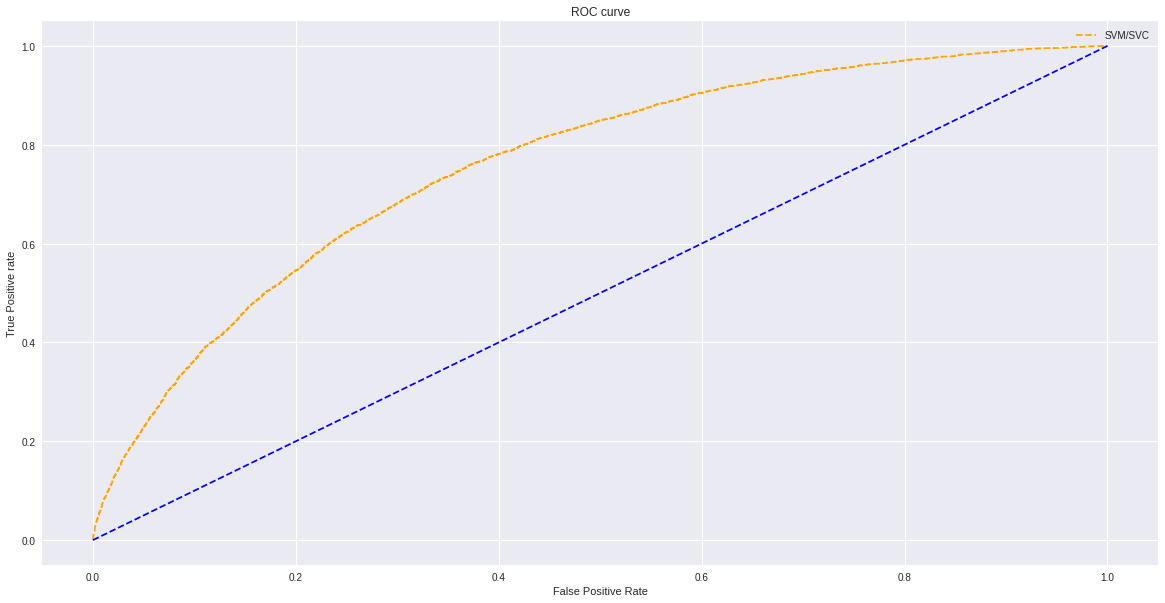

In [ ]:
#SVC
from sklearn.svm import SVC

svc_ = SVC()

svc_.fit(X_train, y_train)

y_pred_svc = svc_.predict(X_test)
predictions = [round(value) for value in y_pred_svc]

svc_accuracy = round(accuracy_score(y_test, y_pred_svc),8)
print(color.BOLD + "Accuracy:", svc_accuracy)

accuracies['Logistic Regression'] = svc_accuracy

print("\nF1 Score: ", round(f1_score(y_test, y_pred_svc, average = "macro"),8))

print("\nPrecision: ", round(precision_score(y_test, y_pred_svc, average = "macro"),8))

print("\nRecall: ", round(recall_score(y_test, y_pred_svc, average = "macro"),8)) 

cm = confusion_matrix(y_test, y_pred_svc)
print("\nConfusion Matrix\n ", cm)

#ROC AUC
pred_prob = logreg.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label = 1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc scores
auc_score = roc_auc_score(y_test, pred_prob, multi_class = "ovr")

print("\nAUC score\n: ", auc_score)

plt.figure(figsize = (20,10))
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle = '--', color = 'orange', label = 'SVM/SVC')
plt.plot(p_fpr, p_tpr, linestyle = '--', color = 'blue')

# title
plt.title('ROC curve')

# x label
plt.xlabel('False Positive Rate')

# y label
plt.ylabel('True Positive rate')
plt.legend(loc = 'best')

### K-Nearest Neighbors



In [ ]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1,26)
scores = {}
scores_list = []

for k in k_range:
  knn_ = KNeighborsClassifier (n_neighbors = k)
  knn_.fit(X_train, y_train)
  y_pred = knn_.predict(X_test)
  scores[k] = metrics.accuracy_score(y_test , y_pred)
  scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing Accuracy')

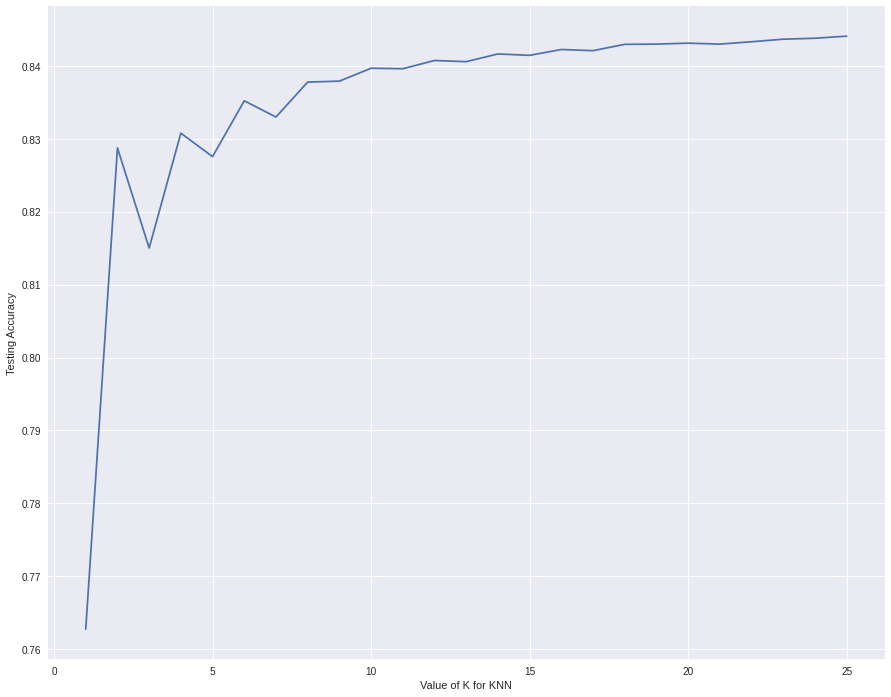

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy

plt.figure(figsize=(15,12))
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

Accuracy: 0.83968361

F1 Score:  0.83968361

Precision:  0.50855636

Recall:  0.39400555

Confusion Matrix
  [[25269   714    21]
 [ 3422   833    35]
 [  584   210    13]]

AUC score
:  0.7231947137789185


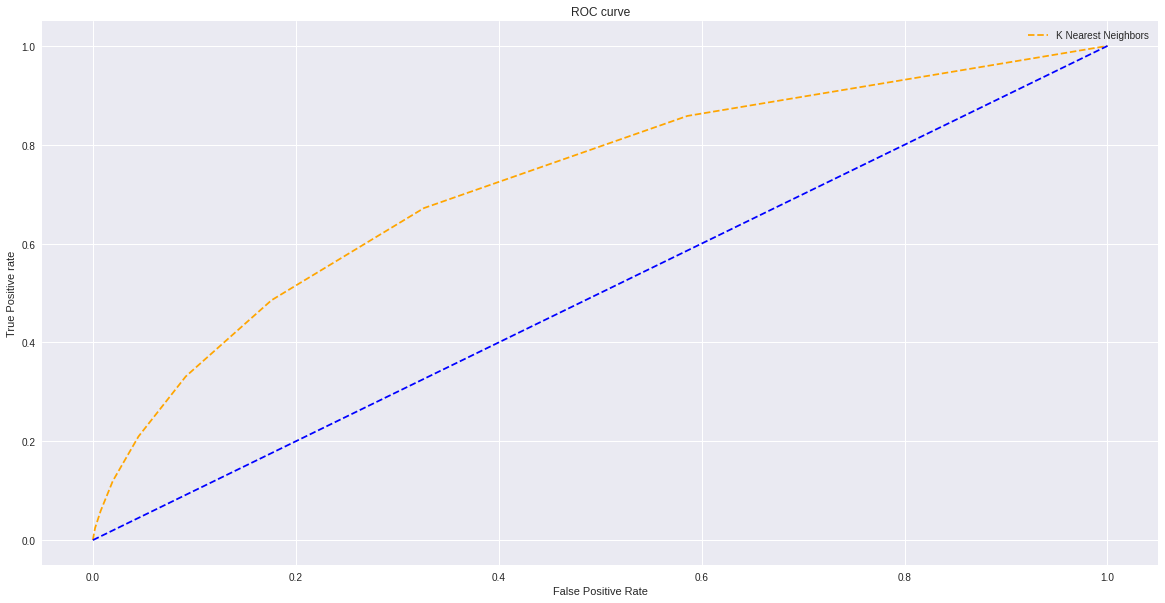

In [ ]:
# Training the K-NN model on the Training set
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

# Predicting the Test set results
y_pred = knn.predict(X_test)

y_pred_knn = knn.predict(X_test)
predictions = [round(value) for value in y_pred_knn]

svc_accuracy = round(accuracy_score(y_test, y_pred_knn),8)
print(color.BOLD + "Accuracy:", svc_accuracy)

accuracies['Logistic Regression'] = svc_accuracy

print("\nF1 Score: ", round(f1_score(y_test, y_pred_knn, average = "micro"),8))

print("\nPrecision: ", round(precision_score(y_test, y_pred_knn, average = "macro"),8))

print("\nRecall: ", round(recall_score(y_test, y_pred_knn, average = "macro"),8)) 

cm = confusion_matrix(y_test, y_pred_knn)
print("\nConfusion Matrix\n ", cm)

#ROC AUC
pred_prob = knn.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label = 1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc scores
auc_score = roc_auc_score(y_test, pred_prob, multi_class = "ovr")

print("\nAUC score\n: ", auc_score)

plt.figure(figsize = (20,10))
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle = '--', color = 'orange', label = 'K Nearest Neighbors')
plt.plot(p_fpr, p_tpr, linestyle = '--', color = 'blue')

# title
plt.title('ROC curve')

# x label
plt.xlabel('False Positive Rate')

# y label
plt.ylabel('True Positive rate')
plt.legend(loc = 'best')

## 4.2.Artificial Neural Network

In [ ]:
#Train Test Split
X_train_net, X_test_net, y_train_net, y_test_net = train_test_split(X, y, train_size=0.65, random_state = 0)

In [ ]:
#Verifying shapes of our test train split
print("X_train_net shape is ", X_train_net.shape)
print("X_test_net shape is ", X_test_net.shape)
print("y_train_net shape is ", y_train_net.shape)
print("y_test_net shape is ", y_test_net.shape)

X_train_net shape is  (57757, 8)
X_test_net shape is  (31101, 8)
y_train_net shape is  (57757,)
y_test_net shape is  (31101,)


In [ ]:
#We do encoding for nominal data so I used get_dummies method
X_train_net = pd.get_dummies(data = X_train_net, columns = ["Season","Pesticide_Use_Category","Soil_Type","Crop_Type"])
X_train_net.head(10)

,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Estimated_Insects_Counts,Season_1,Season_2,Season_3,Pesticide_Use_Category_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Soil_Type_0,Soil_Type_1,Crop_Type_0,Crop_Type_1
56069,20.0,36.00000,0.0,19.871195,0,0,1,0,0,1,1,0,1,0
49232,20.0,38.00000,3.0,22.047222,0,1,0,0,1,0,1,0,1,0
75787,40.0,23.00000,39.0,35.644641,1,0,0,0,1,0,0,1,1,0
20300,20.0,30.00000,18.0,35.059264,0,0,1,0,1,0,1,0,0,1
55416,10.0,42.00000,8.0,29.300122,1,0,0,0,1,0,0,1,1,0
48927,55.0,28.62397,0.0,25.356184,0,0,1,0,0,1,1,0,0,1
41837,20.0,32.00000,17.0,25.914142,0,0,1,0,1,0,1,0,1,0
80645,5.0,10.00000,37.0,29.295601,1,0,0,0,1,0,0,1,1,0
50713,5.0,18.00000,20.0,23.140164,1,0,0,0,1,0,1,0,0,1
1017,80.0,41.00000,4.0,24.796945,0,1,0,0,1,0,1,0,1,0


In [ ]:
#Let us normalize values for features(Number_Doses_Week,	Number_Weeks_Used,	Number_Weeks_Quit,	Estimated_Insects_Counts)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_net = scaler.fit_transform(X_train_net)

In [ ]:
#Performed feature encoding to the X_test feature using get_dummies and then transformed
X_test_net = pd.get_dummies(data = X_test_net, columns=["Season","Pesticide_Use_Category","Soil_Type","Crop_Type"])
X_test_net = scaler.transform(X_test)

In [ ]:
#Importing libraries for Neural Nets
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from keras.models import Model
import tensorflow as tf

In [ ]:
# Define the keras model
model = Sequential()
model.add(Dense(24, input_dim = 14, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(48, activation = 'relu', kernel_initializer = 'glorot_uniform'))
model.add(Dense(64, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(128, activation = 'relu', kernel_initializer = 'glorot_uniform'))
model.add(Dense(96, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(64, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(3, activation='softmax'))

In [ ]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                360       
_________________________________________________________________
dense_1 (Dense)              (None, 48)                1200      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                3136      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 96)                12384     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                6208      
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 1

In [ ]:
#Compile the keras model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
#Fit the keras model on the dataset
model.fit(X_train_net, y_train_net, epochs = 7, batch_size = 16)

Epoch 1/7
3610/3610 [==============================] - 16s 4ms/step - loss: 0.4519 - accuracy: 0.8379
Epoch 2/7
3610/3610 [==============================] - 13s 4ms/step - loss: 0.4427 - accuracy: 0.8397
Epoch 3/7
3610/3610 [==============================] - 13s 4ms/step - loss: 0.4401 - accuracy: 0.8399
Epoch 4/7
3610/3610 [==============================] - 13s 4ms/step - loss: 0.4389 - accuracy: 0.8398
Epoch 5/7
3610/3610 [==============================] - 13s 4ms/step - loss: 0.4383 - accuracy: 0.8398
Epoch 6/7
3610/3610 [==============================] - 13s 4ms/step - loss: 0.4370 - accuracy: 0.8398
Epoch 7/7
3610/3610 [==============================] - 13s 4ms/step - loss: 0.4362 - accuracy: 0.8402


In [ ]:
#Evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

972/972 [==============================] - 3s 3ms/step - loss: 0.4370 - accuracy: 0.8422
Accuracy: 84.22


In [ ]:
#Make probability predictions with the model
predictions = model.predict(X_test)
rounded = [round(x[0]) for x in predictions]
print(rounded)

[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

# Creating Model for deployment

In [1]:
#Importing pandas library which will be used for loading the dataset, Data Analysis, and Data Manipulation
import pandas as pd

#Imported warnings to ignore certain warnings that might arise
import warnings
warnings.filterwarnings('ignore')

#Loading the dataset
df1 = pd.read_csv("/content/drive/MyDrive/train_agriculture.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Agri.csv")
dff = pd.concat([df1, df2])
dff = dff[~dff.index.duplicated(keep = 'first')]

In [2]:
#Replacing missing values with the mean
dff['Number_Weeks_Used'].fillna(dff['Number_Weeks_Used'].mean(),inplace = True)

In [3]:
dff.drop(columns = ["ID"], axis = 1, inplace = True)

In [4]:
#Creating predictors and Target
y = dff['Crop_Damage']
X = dff.drop(columns = ['Crop_Damage'])

In [5]:
import numpy as np
y_mod = np.array(y).reshape((X.shape[0],1))
y_mod.shape

(88858, 1)

In [6]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y_mod)

#Performing Train Test split using sklearn library
from sklearn.model_selection import train_test_split
X_train_dep, X_test_dep, y_train_dep, y_test_dep = train_test_split(X, y, train_size = 0.65, random_state = 0)

In [7]:
from collections import Counter
counter = Counter(y)
print(counter)

Counter({0.0: 74238, 1.0: 74238, 2.0: 74238})



F1 Score:  0.67652196

Precision:  0.68035678

Recall:  0.68756611

Confusion Matrix
  [[22665  1788  1542]
 [ 5129 11552  9346]
 [ 1426  5135 19367]]

AUC score:  0.859768475367186


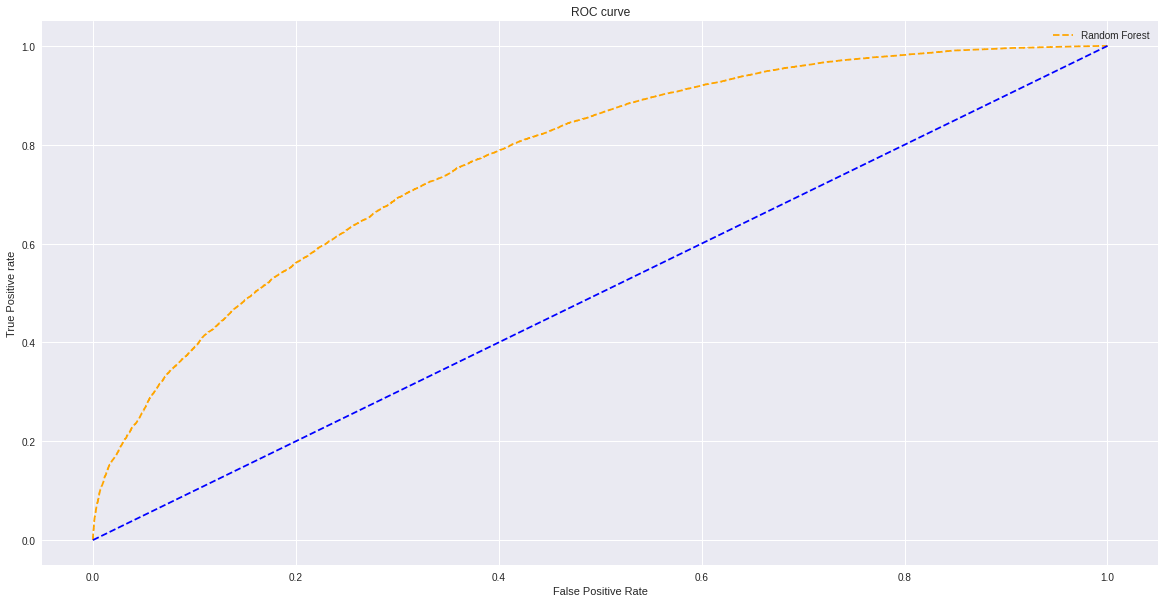

In [8]:
#Random forests is a technique of bagging where in bootstrapping is performed by distributing features to various models that are created
#Then Aggregation takes the majority as the output
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

rf = RandomForestClassifier(n_estimators = 800, 
                            criterion = "entropy", 
                            random_state = 42,
                            max_depth = 8, 
                            min_samples_split = 2,  
                            min_samples_leaf = 3)

rf_dep_ = rf.fit(X_train_dep, y_train_dep)

y_pred_rf = rf_dep_.predict(X_test_dep)
predictions = [round(value) for value in y_pred_rf]

rf_accuracy = round(accuracy_score(y_test_dep, y_pred_rf),8)
#print(color.BOLD + "Accuracy:", rf_accuracy)

print("\nF1 Score: ", round(f1_score(y_test_dep, y_pred_rf, average = "macro"),8))

print("\nPrecision: ", round(precision_score(y_test_dep, y_pred_rf, average = "macro"),8))

print("\nRecall: ", round(recall_score(y_test_dep, y_pred_rf, average = "macro"),8)) 

cm = confusion_matrix(y_test_dep, y_pred_rf)
print("\nConfusion Matrix\n ", cm)

#ROC AUC
pred_prob = rf_dep_.predict_proba(X_test_dep)

# roc curve for models
fpr1, tpr1, thresh1 = metrics.roc_curve(y_test_dep, pred_prob[:,1], pos_label = 1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test_dep))]
p_fpr, p_tpr, _ = roc_curve(y_test_dep, random_probs, pos_label=1)

# auc scores
auc_score = roc_auc_score(y_test_dep, pred_prob, multi_class = 'ovr')

print("\nAUC score: ", auc_score)

import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle = '--', color = 'orange', label = 'Random Forest')
plt.plot(p_fpr, p_tpr, linestyle = '--', color = 'blue')

# title
plt.title('ROC curve')

# x label
plt.xlabel('False Positive Rate')

# y label
plt.ylabel('True Positive rate')
plt.legend(loc = 'best')

In [32]:
values_0 = [0,0,2,10,12,13,2,342]
values_1 = [2688.000000,	0.826276,	0.173724,	2.826276,	60.0,	43.305105,	1.737237,	1.173724]
values_2 = [1056.000000,	0.000000,	0.333631,	2.000000,	25.0,	37.000892,	4.666369,	2.000000]
to_prediction = [np.array(values_2)]

prediction = rf_dep_.predict(np.array(values_2).reshape(1,-1))
output = round(prediction[0], 2)

In [33]:
output

1.0

In [34]:
test = pd.DataFrame(X, columns=dff.columns[:len(dff.columns)-1])
test[y == prediction].head(10)

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
1,209.0,1.0,0.0,1.0,0.0,0.00000,0.0,2.0
2,257.0,1.0,0.0,1.0,0.0,0.00000,0.0,2.0
3,257.0,1.0,1.0,1.0,0.0,0.00000,0.0,2.0
4,342.0,1.0,0.0,1.0,0.0,0.00000,0.0,2.0
5,448.0,0.0,1.0,1.0,0.0,28.62397,0.0,2.0
6,448.0,0.0,1.0,1.0,0.0,28.62397,0.0,2.0
11,1575.0,0.0,0.0,1.0,0.0,0.00000,0.0,1.0
12,1575.0,0.0,1.0,1.0,0.0,0.00000,0.0,2.0
13,1575.0,1.0,1.0,1.0,0.0,0.00000,0.0,2.0
15,1785.0,1.0,1.0,1.0,0.0,0.00000,0.0,2.0


In [44]:
#Exporting the model using joblib library
import joblib
bayer_model_DSInterview_November2021 = joblib.dump(rf_dep_, "Bayer_Crop_Science_Nov2021_DSInterview.pkl")